# 1. Summary

#### Aim:
To understand the relationship between house price and other attributes/features of house. It is of our interest to build a model to predict house price.

#### Data:
- A data set with 76 samples and 3 features (Age, Year and Price) was used for this analysis.
- There were no missing data.

#### Method:
- Simple linear regression models were fitted to explain and predict house price.

- Two models were hypothesised:
    - Hypothesis 1: $Y_{price_i} = \beta_0 + \beta_1 * Year + \beta_2 * Age + \epsilon_i$
    - Hypothesis 2: $Y_{price_i} = \beta_0 + \beta_1 * Age + \epsilon_i$


#### Results and findings:

- It is recommended not to use this sample data to predict house prices. The data set have omitted variables bias and very low sample size.

- Our naive approach to regression model suggests that both features - Age and Year were not statistically significant to explain the relationship and predict house price.


# 2. Technical notes

### Initial hypothesis

House price is influenced by a range of factors such as location, property features, economic conditions - supply and demand, environmental factors, population demographics and current price of the property.

### a. Exploratory data analysis

In [1]:
!python --version

# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

import scipy
import statsmodels.api as sm


Python 3.11.2


##### Read in the data 

In [2]:
data = pd.read_csv('\DATA\homes.csv')

##### Inspect the data

In [3]:
# view top 5 rows
data.head(5)

,Price,Year,Age
0,388.0,1940,65
1,450.0,1957,48
2,386.0,1955,50
3,350.0,1956,49
4,155.5,1994,11


In [4]:
# view bottom 5 rows
data.tail(5)

,Price,Year,Age
71,249.9,1970,35
72,215.0,1936,69
73,435.0,1979,26
74,274.9,1995,10
75,349.5,1979,26


In [5]:
# shape
data.shape

(76, 3)

In [6]:
# information about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   76 non-null     float64
 1   Year    76 non-null     int64  
 2   Age     76 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.9 KB


In [7]:
# missing values
data.isna().sum()

Price    0
Year     0
Age      0
dtype: int64

In [8]:
# missing values
data.isnull().sum()

Price    0
Year     0
Age      0
dtype: int64

Comments:

- The data set has 76 samples and three features.
- The data set has three features - Price, Year and Age. Price is a continuous numeric feature, and Age is a discrete numeric feature.
- The Price is the target or outcome feature.
    
Data quality:
- There are no missing data.

Data adequacy:
- There are only two predictor features in the data set.
- The sample size is low, and details about the sample data is unknown, i.e., location of the houses, property type, etc.

We should be thoughtful of the limitations of data whilst modelling the house price and drawing conclusions.

##### Descriptive statistics

In [9]:
data.describe()

,Price,Year,Age
count,76.000000,76.000000,76.000000
mean,285.796053,1969.407895,35.592105
std,60.333216,23.492511,23.492511
min,155.500000,1905.000000,0.000000
25%,242.750000,1957.750000,25.000000
50%,276.000000,1969.500000,35.500000
75%,336.750000,1980.000000,47.250000
max,450.000000,2005.000000,100.000000


Comments:

- The mean house price is $286K, and median is $276K. The minimum is $156K and maximum is $450K. The SD is $60K. 
- The oldest property was constructed in 1905 and the latest in 2005.
- The mean age of the property is ~36 years and median is ~36. The oldest property is 100 years of age.

##### Visual exploratory analysis

Univariate analysis

Text(0.5, 0, 'Price in $ (000)')

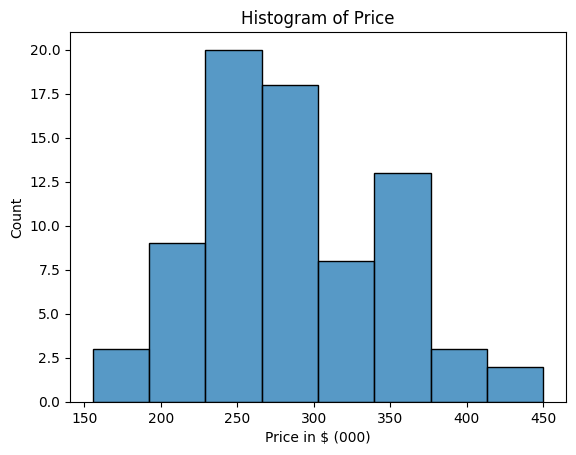

In [10]:
sb.histplot(data['Price'])
plt.title('Histogram of Price')
plt.xlabel('Price in $ (000)')

Text(0.5, 0, 'Price in $ (000)')

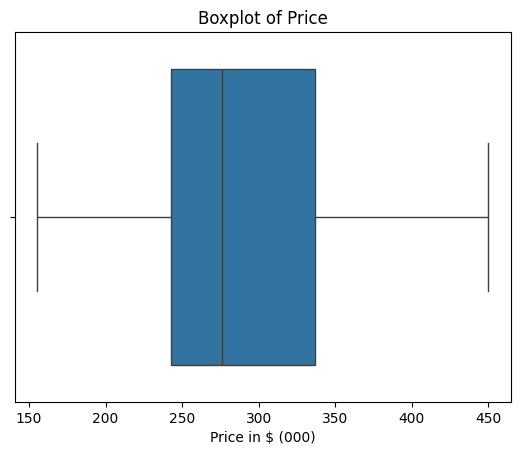

In [11]:
sb.boxplot(data['Price'], orient='h')
plt.title('Boxplot of Price')
plt.xlabel('Price in $ (000)')

In [12]:
# Calculate the skewness 
print(scipy.stats.skew(data['Price'], axis=0, bias=True))

0.35234340981493595


Comments:
- Shape and distribution: The distribution appears to be somewhat Normal. There is a bi-modal pattern in the distribution.
- Outliers and skewness: There are no gross outliers, and there is a slight right-skewness. 

Text(0.5, 0, 'Age')

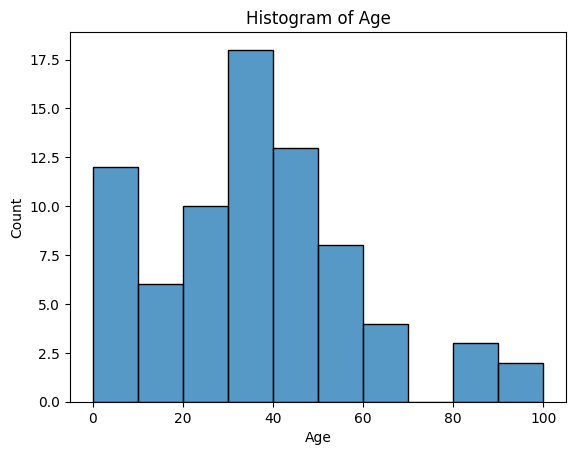

In [13]:
sb.histplot(data['Age'])
plt.title('Histogram of Age')
plt.xlabel('Age')

Comments:
- Most of the houses are under ~50 years of age.
- There are very few houses that are above ~70 years of age.

Text(0.5, 1.0, 'Distribution of samples by year')

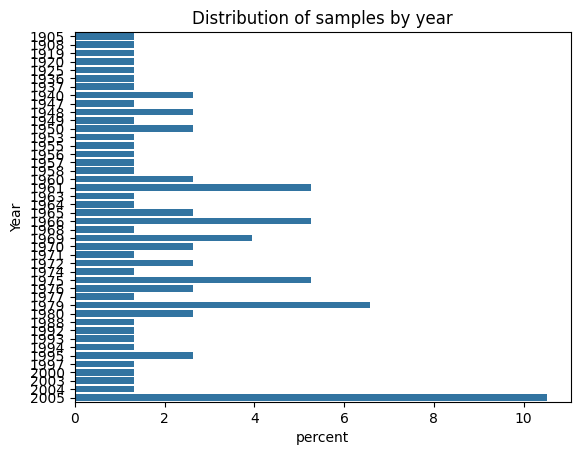

In [14]:
plt = sb.countplot(y = 'Year',
            data = data, 
            orient = 'h',
            stat = 'percent')
            #order = data['Year'].value_counts().index)
plt.set_title('Distribution of samples by year')
#plt.set_xticklabels(plt.get_xticklabels(), rotation=45)

Text(0.5, 1.0, 'Distribution of samples by year')

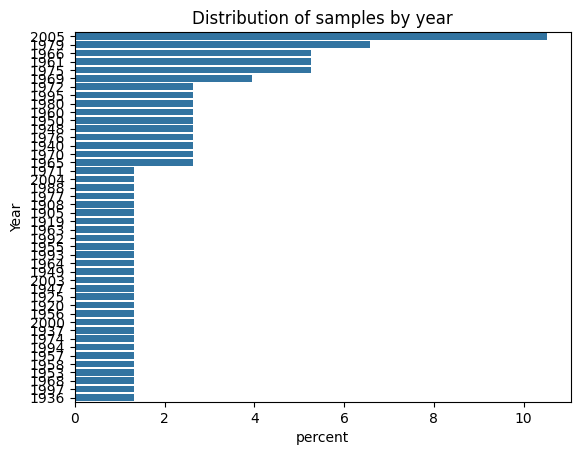

In [15]:
plt = sb.countplot(y = 'Year',
            data = data, 
            orient = 'h',
            stat = 'percent',
            order = data['Year'].value_counts().index)
plt.set_title('Distribution of samples by year')


Comments:
- The Year ranges between 1905 and 2005. 
- The Year don't appear to be in sequence and there are breaks in between.
- There is data imbalance and a major bunch of samples have come from 1965 onwards and until 2005.

##### Pairs plot

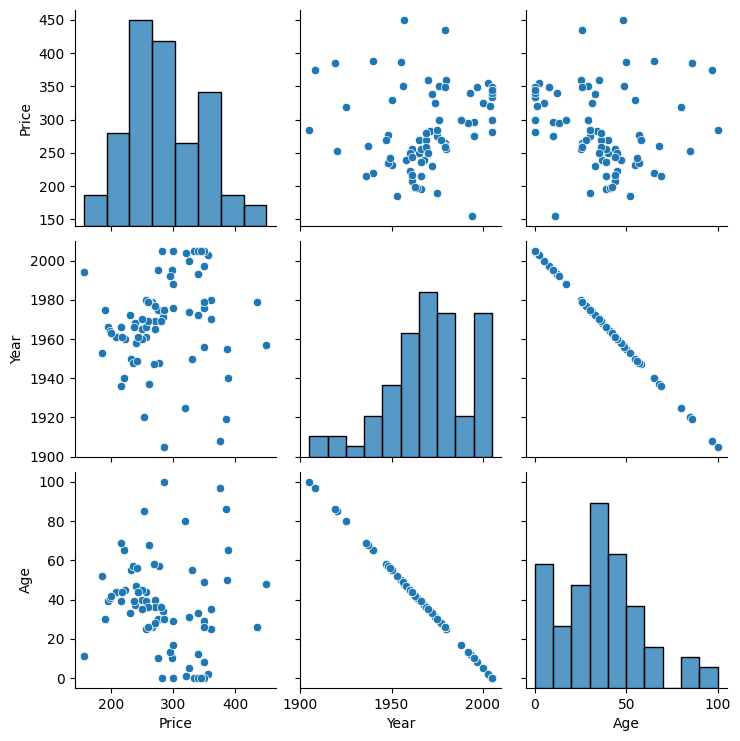

In [16]:
sb.pairplot(data)

Comments:
- Price and the other two variables have some complex relationship.
- The scatter plot shows non-constant variance among these variables.

##### Correlation

In [17]:
data[['Year', 'Age', 'Price']].corr(method='pearson')

,Year,Age,Price
Year,1.00000,-1.00000,0.15414
Age,-1.00000,1.00000,-0.15414
Price,0.15414,-0.15414,1.00000


Text(0.5, 1.0, 'Correlation heatmap')

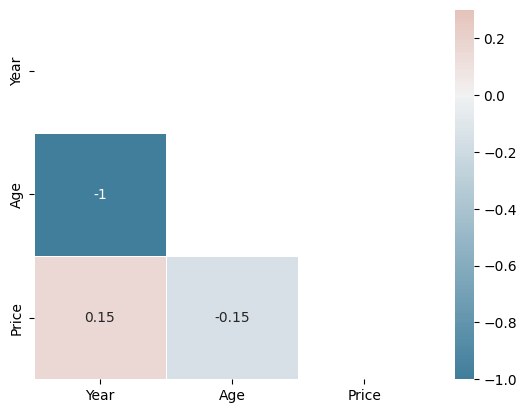

In [18]:
corr_mat = data[['Year', 'Age', 'Price']].corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 5))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

sb.heatmap(corr_mat,
           annot=True,
           linewidth=.5,
           center=0,
           mask=mask,
           cmap=cmap, vmax=.3)
#plt.yticks(rotation=45)
plt.set_title('Correlation heatmap')

Comments:

- Interesting, Year and Age have perfect negative correlation (-1). As Year increases age decrease, and vice-versa.
    - So how are they associated with Price: 
        - Year and Price are somewhat positively correlated (0.15), as Year increases price also increase slightly.
        - On the other hand, as Age of the property increases the Price decreases.



### b. Model building

Initial thoughts and hypothesis: 

- The features and data aren't adequate to build a prediction model for house price. For instance, there is omitted variable bias and lack of sample size. As a result, the model would lead to biased and inaccurate outcomes. Therefore, it is not recommended to build a model for this data set.

- Assuming if we are to build a model to explain the relationship between house price and age, let's take a naive approach and hypothesise the following:

    - Hypothesis 1: $Y_{price_i} = \beta_0 + \beta_1 * Year + \beta_2 * Age + \epsilon_i$
    - Hypothesis 2: $Y_{price_i} = \beta_0 + \beta_1 * Age + \epsilon_i$

Linear regression assumptions:

- IID: Sample data are independent of each other, and come from identical/Normal distribution,
- The expected value ($\mu$) is a linear combination of features,
- The errors/residuals have constant variance.

##### Fit the model for hypothesis 1:

In [19]:
# set X and Y

Y = data['Price']
X = data[['Year', 'Age']]

# add constant

X = sm.add_constant(X)
X.head(5)

,const,Year,Age
0,1.0,1940,65
1,1.0,1957,48
2,1.0,1955,50
3,1.0,1956,49
4,1.0,1994,11


In [20]:
# fit the model

lm_fit1 = sm.OLS(Y, X)
lm_fit1_result = lm_fit1.fit()
lm_fit1_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.801
Date:                Tue, 10 Dec 2024   Prob (F-statistic):              0.184
Time:                        20:17:08   Log-Likelihood:                -418.01
No. Observations:                  76   AIC:                             840.0
Df Residuals:                      74   BIC:                             844.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.824e-05      0.000     -0.340      0.735      -0.000       0.000
Year           0.1496      0.006     23.886      0.000       0.137       0.162
Age           -0.2463      0.290     -0.850      0.398      -0.824       0.331
==============================================================================
Omnibus:                        3.534   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                2.926
Skew:                           0.472   Prob(JB):                        0.232
Kurtosis:                       3.185   Cond. No.                     1.14e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.26e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

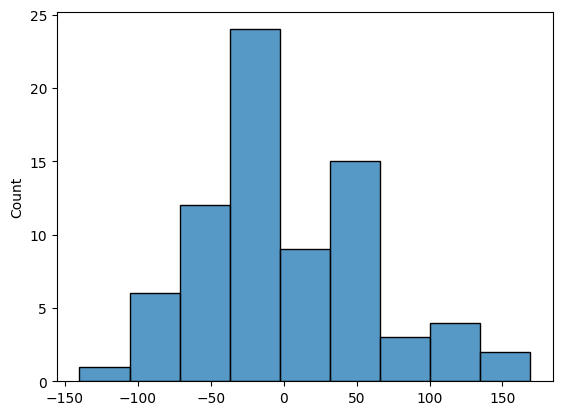

In [21]:
# Goodness of fit - Residuals

sb.histplot(lm_fit1_result.resid);

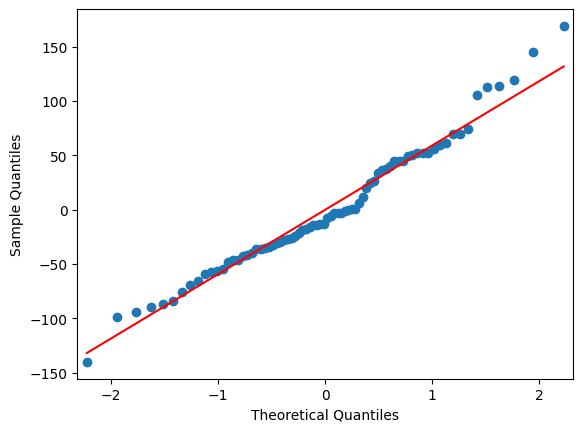

In [22]:
sm.qqplot(lm_fit1_result.resid, line='s');

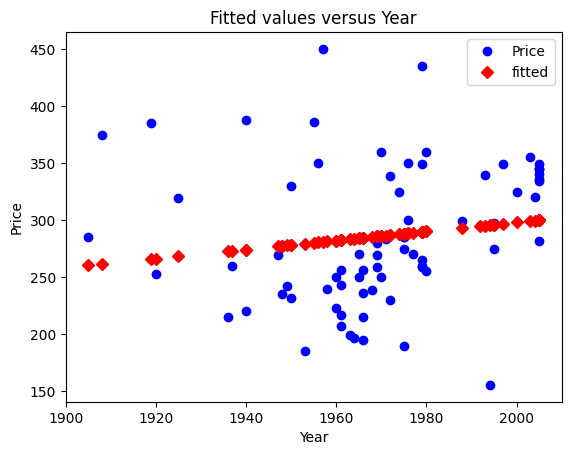

In [23]:
sm.graphics.plot_fit(lm_fit1_result, 1, vlines=False);

Comments: 
- The model summary suggests that Year is statistically significant and as Year increases Price increase by $0.15K.
- The goodness of fit residuals plot and QQ plot shows no major concerns.
- The regression plot shows that the model hasn't captured all variation in the house price.

As a next step, let's drop the Age variable and re-fit the model.

In [24]:
# set X and Y
Y = data['Price']
X = data['Year']

# add constant

X = sm.add_constant(X)

# fit the model
lm_fit1 = sm.OLS(Y, X)
lm_fit1_result = lm_fit1.fit()
lm_fit1_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.801
Date:                Tue, 10 Dec 2024   Prob (F-statistic):              0.184
Time:                        20:17:09   Log-Likelihood:                -418.01
No. Observations:                  76   AIC:                             840.0
Df Residuals:                      74   BIC:                             844.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -493.8159    580.973     -0.850      0.398   -1651.430     663.798
Year           0.3959      0.295      1.342      0.184      -0.192       0.984
==============================================================================
Omnibus:                        3.534   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                2.926
Skew:                           0.472   Prob(JB):                        0.232
Kurtosis:                       3.185   Cond. No.                     1.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Comments:
- Interesting, Year is no longer statistically significant to explain or predict the house price.

##### Fit the model for hypothesis 2:

In [25]:
# set X and Y

Y = data['Price']
X = data['Age']

# add constant

X = sm.add_constant(X)
X.head(5)

,const,Age
0,1.0,65
1,1.0,48
2,1.0,50
3,1.0,49
4,1.0,11


In [26]:
# fit the model

lm_fit2 = sm.OLS(Y, X)
lm_fit2_result = lm_fit2.fit()
lm_fit2_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.801
Date:                Tue, 10 Dec 2024   Prob (F-statistic):              0.184
Time:                        20:17:09   Log-Likelihood:                -418.01
No. Observations:                  76   AIC:                             840.0
Df Residuals:                      74   BIC:                             844.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        299.8856     12.555     23.887      0.000     274.870     324.901
Age           -0.3959      0.295     -1.342      0.184      -0.984       0.192
==============================================================================
Omnibus:                        3.534   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                2.926
Skew:                           0.472   Prob(JB):                        0.232
Kurtosis:                       3.185   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comments: 
- The model summary suggests that Age is not statistically significant to explain or predict the house Price (for this sample data).